In [1]:
import pandas as pd

In [2]:
hotels = pd.read_csv('Data/hotels.csv')
hotels.head(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643


In [6]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = hotels.drop(['reviewer_score'], axis = 1)  
y = hotels['reviewer_score'] 

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [6]:
# удалим нечисловые столбцы
#X = X.drop(['hotel_address', 'review_date', 'hotel_name', 'reviewer_nationality', 'negative_review', 'positive_review', 'tags', 'days_since_review'], axis = 1)

In [7]:
# заполним пропуски медианными значениями
#X['lat'] = X['lat'].fillna(X['lat'].median())
#X['lng'] = X['lng'].fillna(X['lng'].median())
#X = X.fillna(0)

In [8]:
# непрерывные признаки
num_cols = ['total_number_of_reviews', 'review_total_negative_word_counts', 'review_total_positive_word_counts', 'additional_number_of_scoring', 'total_number_of_reviews_reviewer_has_given']

# категориальные признаки
cat_cols = ['average_score', 'lat', 'additional_number_of_scoring']

In [9]:
# Для оценки значимости категориальных переменных будем использовать изученный нами непараметрический тест 
# хи-квадрат, реализованный в библиотеке sklearn.feature_selection.chi2. Метод возвращает массив значений 
# хи-квадрат и p-value для каждого признака.

y=y.astype('int')

from sklearn.feature_selection import chi2 # хи-квадрат

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

<AxesSubplot:>

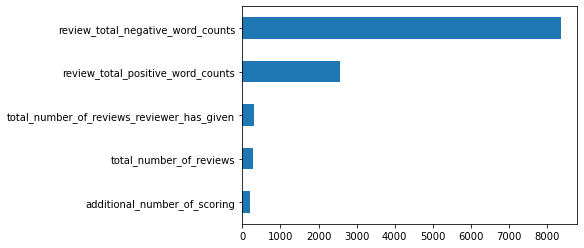

In [ ]:
# Для оценки значимости непрерывных переменных будем использовать функцию f_classif из библиотеки sklearn. 
# В основе метода оценки значимости переменных лежит изученный вами в юнитах по статистике анализ (ANOVA). 
# Основу процедуры составляет обобщение результатов двух выборочных t-тестов для независимых выборок (2-sample t).

from sklearn.feature_selection import f_classif # anova

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 8 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386803 non-null  int64  
 1   average_score                               386803 non-null  float64
 2   review_total_negative_word_counts           386803 non-null  int64  
 3   total_number_of_reviews                     386803 non-null  int64  
 4   review_total_positive_word_counts           386803 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  386803 non-null  int64  
 6   lat                                         386803 non-null  float64
 7   lng                                         386803 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 23.6 MB


In [ ]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split  

In [ ]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
    
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  

In [ ]:
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  

RandomForestRegressor()

In [ ]:
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)

In [ ]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.14130869609270588


Небольшой бонус:


In [ ]:
# # убираем признаки которые еще не успели обработать, 
# # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
# object_columns = [s for s in hotels.columns if hotels[s].dtypes == 'object']
# hotels.drop(object_columns, axis = 1, inplace=True)

# # заполняем пропуски самым простым способом
# hotels = hotels.fillna(0)

###  Задание 4.2
Сколько отелей представлено в наборе данных?

In [ ]:
hotels['hotel_name'].nunique()

1492

###  Задание 4.3
Ответьте на вопросы о дате размещения отзывов.
- Когда был оставлен самый свежий отзыв? Введите ответ в формате yyyy-mm-dd.
- Когда был оставлен самый первый отзыв? Введите ответ в формате yyyy-mm-dd.

In [ ]:
hotels['review_date'] = pd.to_datetime(hotels['review_date'])
display(hotels['review_date'].max())
display(hotels['review_date'].min())

Timestamp('2017-08-03 00:00:00')

Timestamp('2015-08-04 00:00:00')

###  Задание 4.4
Сколько уникальных тегов представлено в наборе данных?

In [3]:
hotels['tags_split'] = hotels['tags'].apply(lambda tags: tags[2:-2].strip().split(' \', \' '))
hotels = hotels.explode('tags_split')

hotels['tags_split'].nunique()

2368

###  Задание 4.5
Какой тег представлен в наибольшем числе отзывов?

In [5]:
hotels['tags_split'].mode()[0]

'Leisure trip'

###  Задание 4.6
Из тегов выясните, на сколько ночей чаще всего останавливаются путешественники в отелях.

In [6]:
hotels['tags_split'].value_counts()

Leisure trip                         313593
Submitted from a mobile device       230778
Couple                               189212
Stayed 1 night                       145373
Stayed 2 nights                      100263
                                      ...  
Studio with Spa Access                    1
Comfort Family Room                       1
Junior Suite Free Wifi                    1
Design Suite                              1
Executive Double Room Non Smoking         1
Name: tags_split, Length: 2368, dtype: int64